# CODE TO PERFORM SIMPLE LINEAR REGRESSION ON FUEL CONSUMPTION DATASET


# PROBLEM STATEMENT

- You have been hired as a consultant to a major Automotive Manufacturer and you have been tasked to develop a model to predict the impact of increasing the vehicle horsepower (HP) on fuel economy (Mileage Per Gallon (MPG)). You gathered the data:
- Data set:
    - Independant variable X: Vehicle Horse Power 
    - Dependant variable Y: Mileage Per Gallon (MPG) 

#### Import dataset and packages


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
Feco_df = pd.read_csv("FuelEconomy.csv")

In [5]:
Feco_df.head(10)

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739
5,175.838106,24.173571
6,271.441608,17.163583
7,294.425916,17.274218
8,126.211008,28.718210
9,163.350335,28.289516


In [6]:
Feco_df.tail(10)

,Horse Power,Fuel Economy (MPG)
90,237.673085,19.723462
91,205.046797,25.286954
92,227.380124,24.181109
93,131.542116,29.397567
94,260.674444,17.802706
95,162.810542,27.418661
96,266.869640,15.989945
97,243.831211,19.253375
98,140.959803,29.515593
99,184.123053,25.196097


In [7]:
Feco_df.describe()

,Horse Power,Fuel Economy (MPG)
count,100.000000,100.000000
mean,213.676190,23.178501
std,62.061726,4.701666
min,50.000000,10.000000
25%,174.996514,20.439516
50%,218.928402,23.143192
75%,251.706476,26.089933
max,350.000000,35.000000


In [8]:
Feco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Horse Power         100 non-null    float64
 1   Fuel Economy (MPG)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


#### Data Visualization

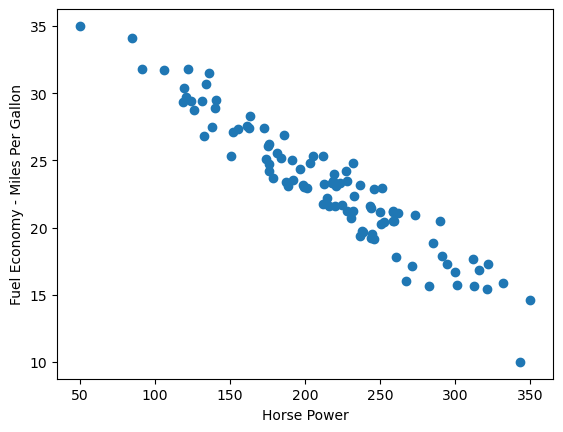

In [9]:
X = np.array(Feco_df['Horse Power'])
y = np.array(Feco_df['Fuel Economy (MPG)'])
plt.scatter(X,y)
plt.xlabel("Horse Power")
plt.ylabel("Fuel Economy - Miles Per Gallon")
plt.show()

In [10]:
!conda install seaborn -y

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Rusmika\anaconda3

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.9.9   |       haa95532_0         127 KB
    certifi-2025.8.3           |  py312haa95532_0         160 KB
    openssl-3.0.17             |       h35632f6_0         7.8 MB
    seaborn-0.13.2             |  py312haa95532_3         715 KB
    ucrt-10.0.22621.0          |       haa95532_0         620 KB
    vc14_runtime-14.44.35208   |      h4927774_10         825 KB
    vs2015_runtime-14.44.35208 |      ha6b5a95_10          19 KB
    ------------------------------------------------------------
                                           Total:        10.2 MB

The following NEW packages will be INSTALLED:

  ucrt               pkgs/main

In [11]:
import seaborn as sns

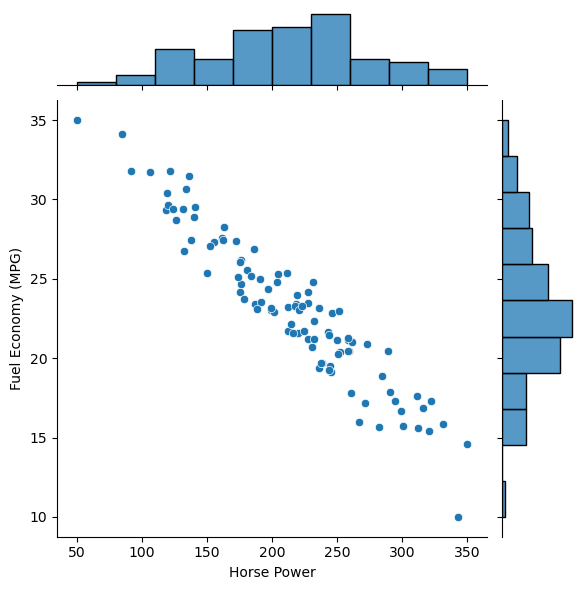

In [13]:
sns.jointplot (x='Horse Power',y='Fuel Economy (MPG)', data=Feco_df)

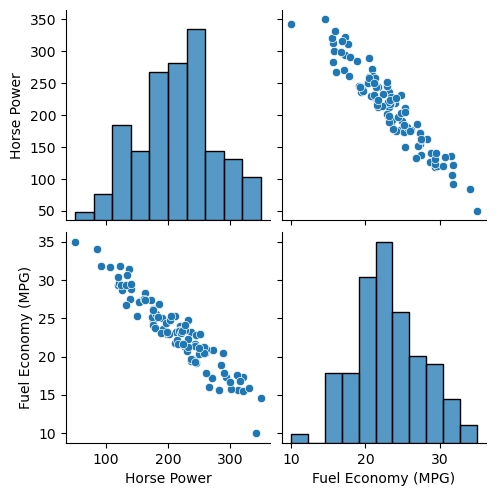

In [14]:
sns.pairplot(data=Feco_df)

#### Testing and Training Data set

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

#### Model Training

In [18]:
X_train=X_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
from sklearn.linear_model import LinearRegression

In [19]:
SLR = LinearRegression()

SLR.fit(X_train,y_train)

LinearRegression()

In [22]:
print("Linear Model intercept (b):", SLR.intercept_)
print("Linear Model Coefficient (m):", SLR.coef_)

Linear Model intercept (m): [39.01235426]
Linear Model Coefficient (b): [[-0.07495743]]


#### Model Testing

In [25]:
y_predict = SLR.predict(X_test.reshape(-1,1))

In [30]:
Accu_SLR=SLR.score(X_test.reshape(-1,1),y_test.reshape(-1,1))

In [31]:
Accu_SLR

0.8064043822128999

__80.6% Accuracy__

Text(0.5, 0, 'MPG')

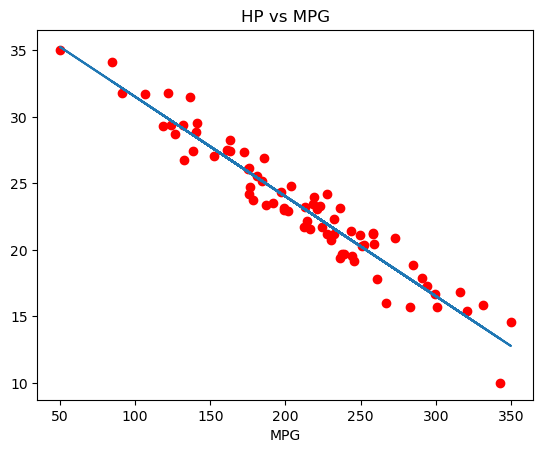

In [34]:
plt.scatter(X_train, y_train, color="r")
plt.plot(X_train,SLR.predict(X_train))
plt.title("HP vs MPG")
plt.xlabel("HP")
plt.xlabel("MPG")
         

Text(0.5, 0, 'MPG')

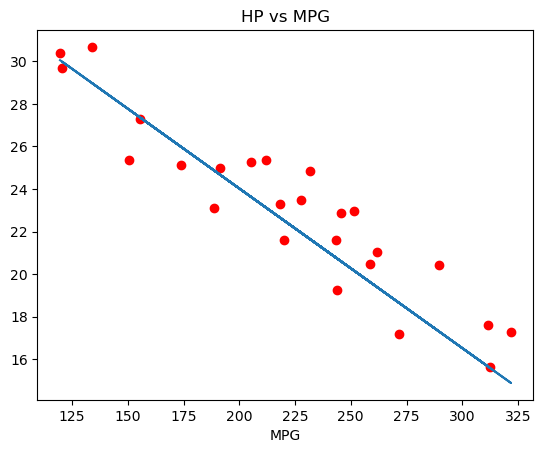

In [36]:
plt.scatter(X_test, y_test, color="r")
plt.plot(X_test,SLR.predict(X_test.reshape(-1,1)))
plt.title("HP vs MPG")
plt.xlabel("HP")
plt.xlabel("MPG")

In [38]:
HP = [[240]]
y_predict = SLR.predict(HP)
y_predict

array([[21.02257203]])